# Анализ фильмов IMDb

Датасет представляет собой набор данных о фильмах:

1. movie_title — название фильма.
2. title_year — год выпуска.
3. content_rating — возрастной рейтинг.
4. budget — бюджет в $.
5. imdb_score — оценка IMDb.
6. genres — жанры.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

df = pd.read_csv('movie_metadata.csv')
df[['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']].corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.258486,0.180674,0.271646,0.190016,0.480601,0.624943,0.263203,-0.033897,0.609387,0.119994,0.275707,0.282306,0.305303,-0.049786,0.683176
duration,0.258486,1.000000,0.173296,0.123558,0.088449,0.250298,0.314765,0.123074,0.013469,0.328403,0.074276,-0.135038,0.131673,0.261662,-0.090071,0.196605
director_facebook_likes,0.180674,0.173296,1.000000,0.120199,0.090723,0.144945,0.297057,0.119549,-0.041268,0.221890,0.021090,-0.063820,0.119601,0.170802,0.001642,0.162048
actor_3_facebook_likes,0.271646,0.123558,0.120199,1.000000,0.249927,0.308026,0.287239,0.473920,0.099368,0.230189,0.047451,0.096137,0.559662,0.052633,-0.003366,0.278844
actor_1_facebook_likes,0.190016,0.088449,0.090723,0.249927,1.000000,0.154468,0.192804,0.951661,0.072257,0.145461,0.022639,0.086873,0.390487,0.076099,-0.020049,0.135348
gross,0.480601,0.250298,0.144945,0.308026,0.154468,1.000000,0.637271,0.247400,-0.027755,0.559958,0.102179,0.030886,0.262768,0.198021,0.069346,0.378082
num_voted_users,0.624943,0.314765,0.297057,0.287239,0.192804,0.637271,1.000000,0.265911,-0.026998,0.798406,0.079621,0.007397,0.270790,0.410965,-0.014761,0.537924
cast_total_facebook_likes,0.263203,0.123074,0.119549,0.473920,0.951661,0.247400,0.265911,1.000000,0.091475,0.206923,0.036557,0.109971,0.628404,0.085787,-0.017885,0.209786
facenumber_in_poster,-0.033897,0.013469,-0.041268,0.099368,0.072257,-0.027755,-0.026998,0.091475,1.000000,-0.069018,-0.019559,0.061504,0.071228,-0.062958,0.013713,0.008918
num_user_for_reviews,0.609387,0.328403,0.221890,0.230189,0.145461,0.559958,0.798406,0.206923,-0.069018,1.000000,0.084292,-0.003147,0.219496,0.292475,-0.024719,0.400594


In [2]:
features = ['movie_title', 'title_year', 'content_rating', 'budget', 'imdb_score', 'genres']
df = df[features]
df.dropna(subset=['budget', 'imdb_score', 'title_year', 'content_rating'], inplace=True)
df.head(3)

,movie_title,title_year,content_rating,budget,imdb_score,genres
0,Avatar,2009.0,PG-13,237000000.0,7.9,Action|Adventure|Fantasy|Sci-Fi
1,Pirates of the Caribbean: At World's End,2007.0,PG-13,300000000.0,7.1,Action|Adventure|Fantasy
2,Spectre,2015.0,PG-13,245000000.0,6.8,Action|Adventure|Thriller


#### Наиболее частые жанры
Если хотя бы у 400 фильмов присутствует жанр, то добавляем его в список жанров для анализа.

In [3]:
number_of_movies = {}
for genres in df.genres:
    for genre in genres.split('|'):
        if genre in number_of_movies:
            number_of_movies[genre] += 1
        else:
            number_of_movies[genre] = 0

genres = []
for genre in number_of_movies:
    if number_of_movies[genre] > 400:
        genres.append(genre)

print(*genres, sep=', ')

Action, Adventure, Fantasy, Sci-Fi, Thriller, Romance, Comedy, Family, Mystery, Drama, Crime, Horror


#### Визуализируем данные рейтинга IMDb

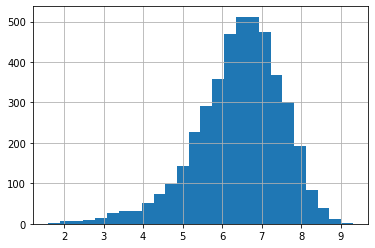

In [4]:
df['imdb_score'].hist(bins=26);

#### Проверка на нормальность

Проверим на нормальность распределения рейтинга IMDb по жанрам

In [5]:
genres_df = pd.DataFrame(columns=['genre', 'mean', 'std', 'D', 'p-value'])
i = 0
for genre in genres:
    data = df[df['genres'].str.contains(genre)]
    
    a = data['imdb_score'].mean()
    sigma = data['imdb_score'].std()
    
    cdf = stats.norm(loc=a, scale=sigma).cdf
    kstest = stats.kstest(rvs=data['imdb_score'], cdf=cdf, alternative='greater')
    genres_df.loc[i] = [genre, a, sigma, *kstest]
    i += 1
    
genres_df.sort_values(by=['mean'], ascending=False)

,genre,mean,std,D,p-value
9,Drama,6.768696,0.933508,0.035725,0.003689
10,Crime,6.527792,0.997622,0.030806,0.219563
5,Romance,6.449068,0.978385,0.036055,0.079208
8,Mystery,6.441839,1.049510,0.031150,0.421169
1,Adventure,6.434107,1.120207,0.029047,0.229040
4,Thriller,6.326935,1.008380,0.024965,0.202969
2,Fantasy,6.275763,1.159635,0.029722,0.366513
3,Sci-Fi,6.272598,1.187981,0.035203,0.242632
0,Action,6.231776,1.086837,0.033230,0.092060
7,Family,6.224797,1.197568,0.028475,0.441935


Для 10 из 12 наиболее частых жанров при критическом значении равном 5% можно принять гипотезу о том, что распределение рейтинга IMDb нормальное

# Что ещё сделать

>pr8) С помощью факторного анализа посмотрим какие самые важные для подсчета рейтинга IMDb. Только после этого удалим лишние.

>Заполним пустые значения

>С помощью критерию стьюдента докажем что выборки с разными жанрами, зависят от
>8) Также с помощью дисперсионного анализа посмотрим на влияние жанра на рейтинг

>?С помощью многфакторного дисперсионного анализа сравним выборки и найдем признаки не зависящие от жанра

>С помощью лин регрессии предскажем рейтинг на основе важных признаков из первого пункта

>Оценка значимости уравнения линейной регрессии